---

# <center> ★ AI / ML Project - Wine Quality Investigation ★
#### <center> ***Domain: Healthcare***

---

<img src="wq.jpg" style="width: 500px;"/>

---

### Description:

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

**This data frame contains the following columns:**

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

### Acknowledgements:
This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict the quality of red wine.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [20]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [38]:
#Importing the dataset

df = pd.read_csv('train.csv')

target = 'quality'
labels = ['Quality-3','Quality-4','Quality-5','Quality-6','Quality-7','Quality-8']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4


Inference: The Datset consists of 13 features & 1143 samples.


In [39]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [40]:
#Checking number of unique rows in each feature

df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [41]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 12 numerical & 0 categorical features.


In [42]:
#Checking the stats of all the columns

display(df.describe())

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


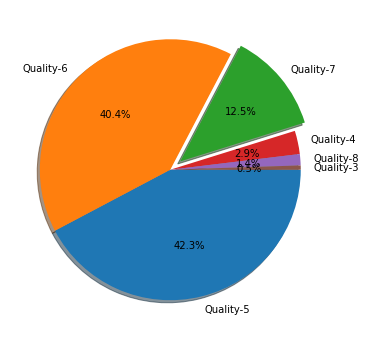

In [58]:
#Let us first analyze the distribution of the target variable

MAP={}
for i in df[target].unique():
    MAP[i]='Quality-'+str(i)
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-4]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1)
plt.show()

**Inference:** The Target Variable seems to be alittle imbalanced! We shall try to fix this by augmenting data in the preprocessing step...

In [59]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,2.5*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=4:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(math.ceil(len(cf)/2),2,i)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

                               Visualising Categorical Features:                                


<Figure size 1080x0 with 0 Axes>

**Inference:** There are no categorical features to visualize.

                                     Features Distribution                                      


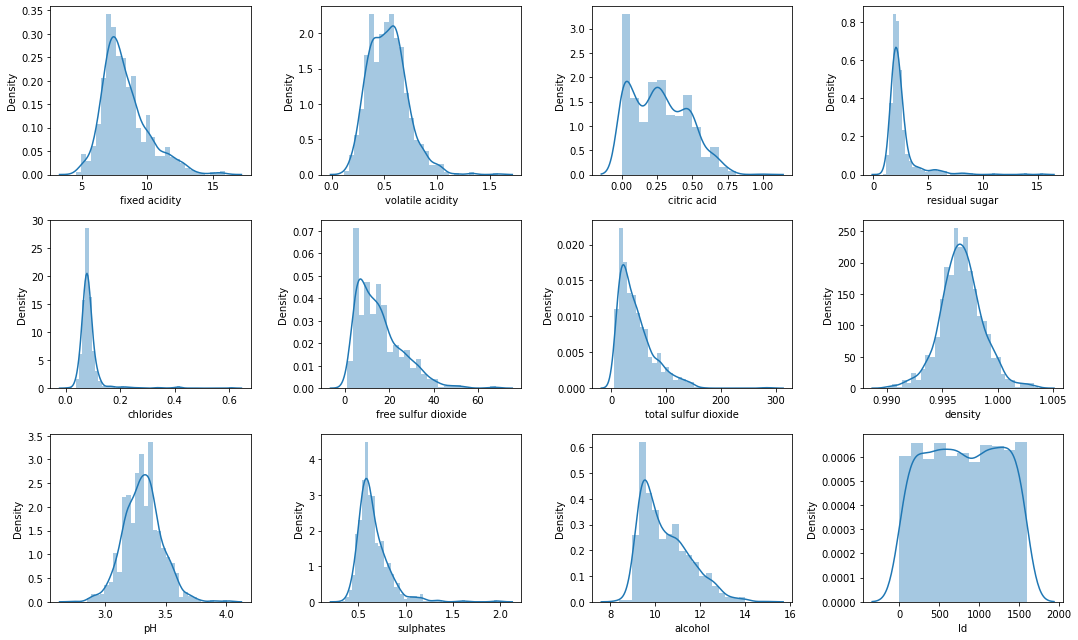

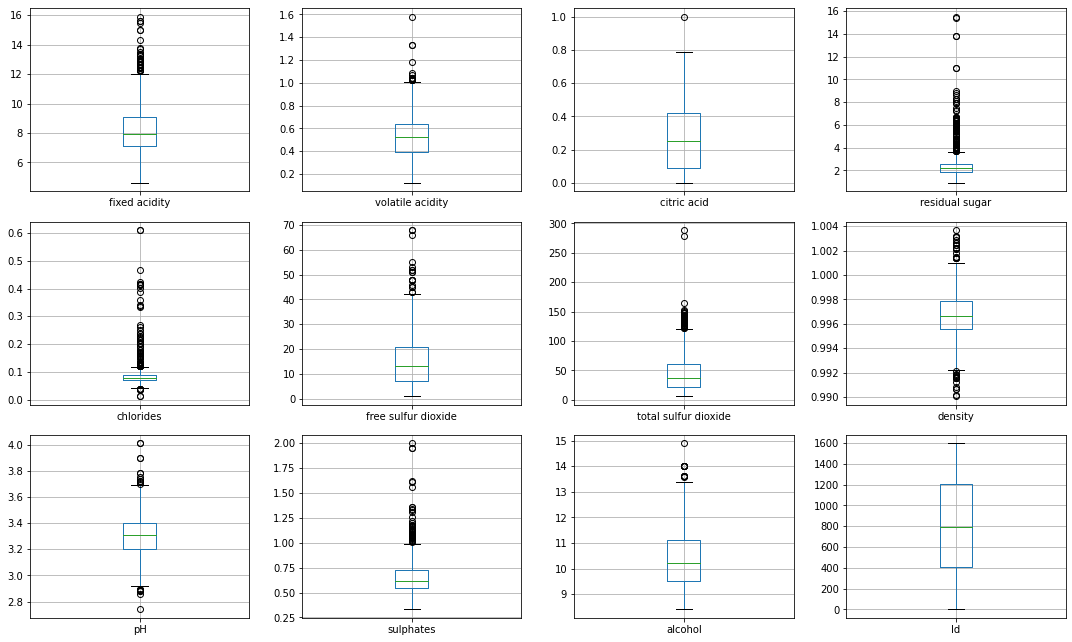

In [66]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/4)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/4),4,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/4)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/4),4,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset.

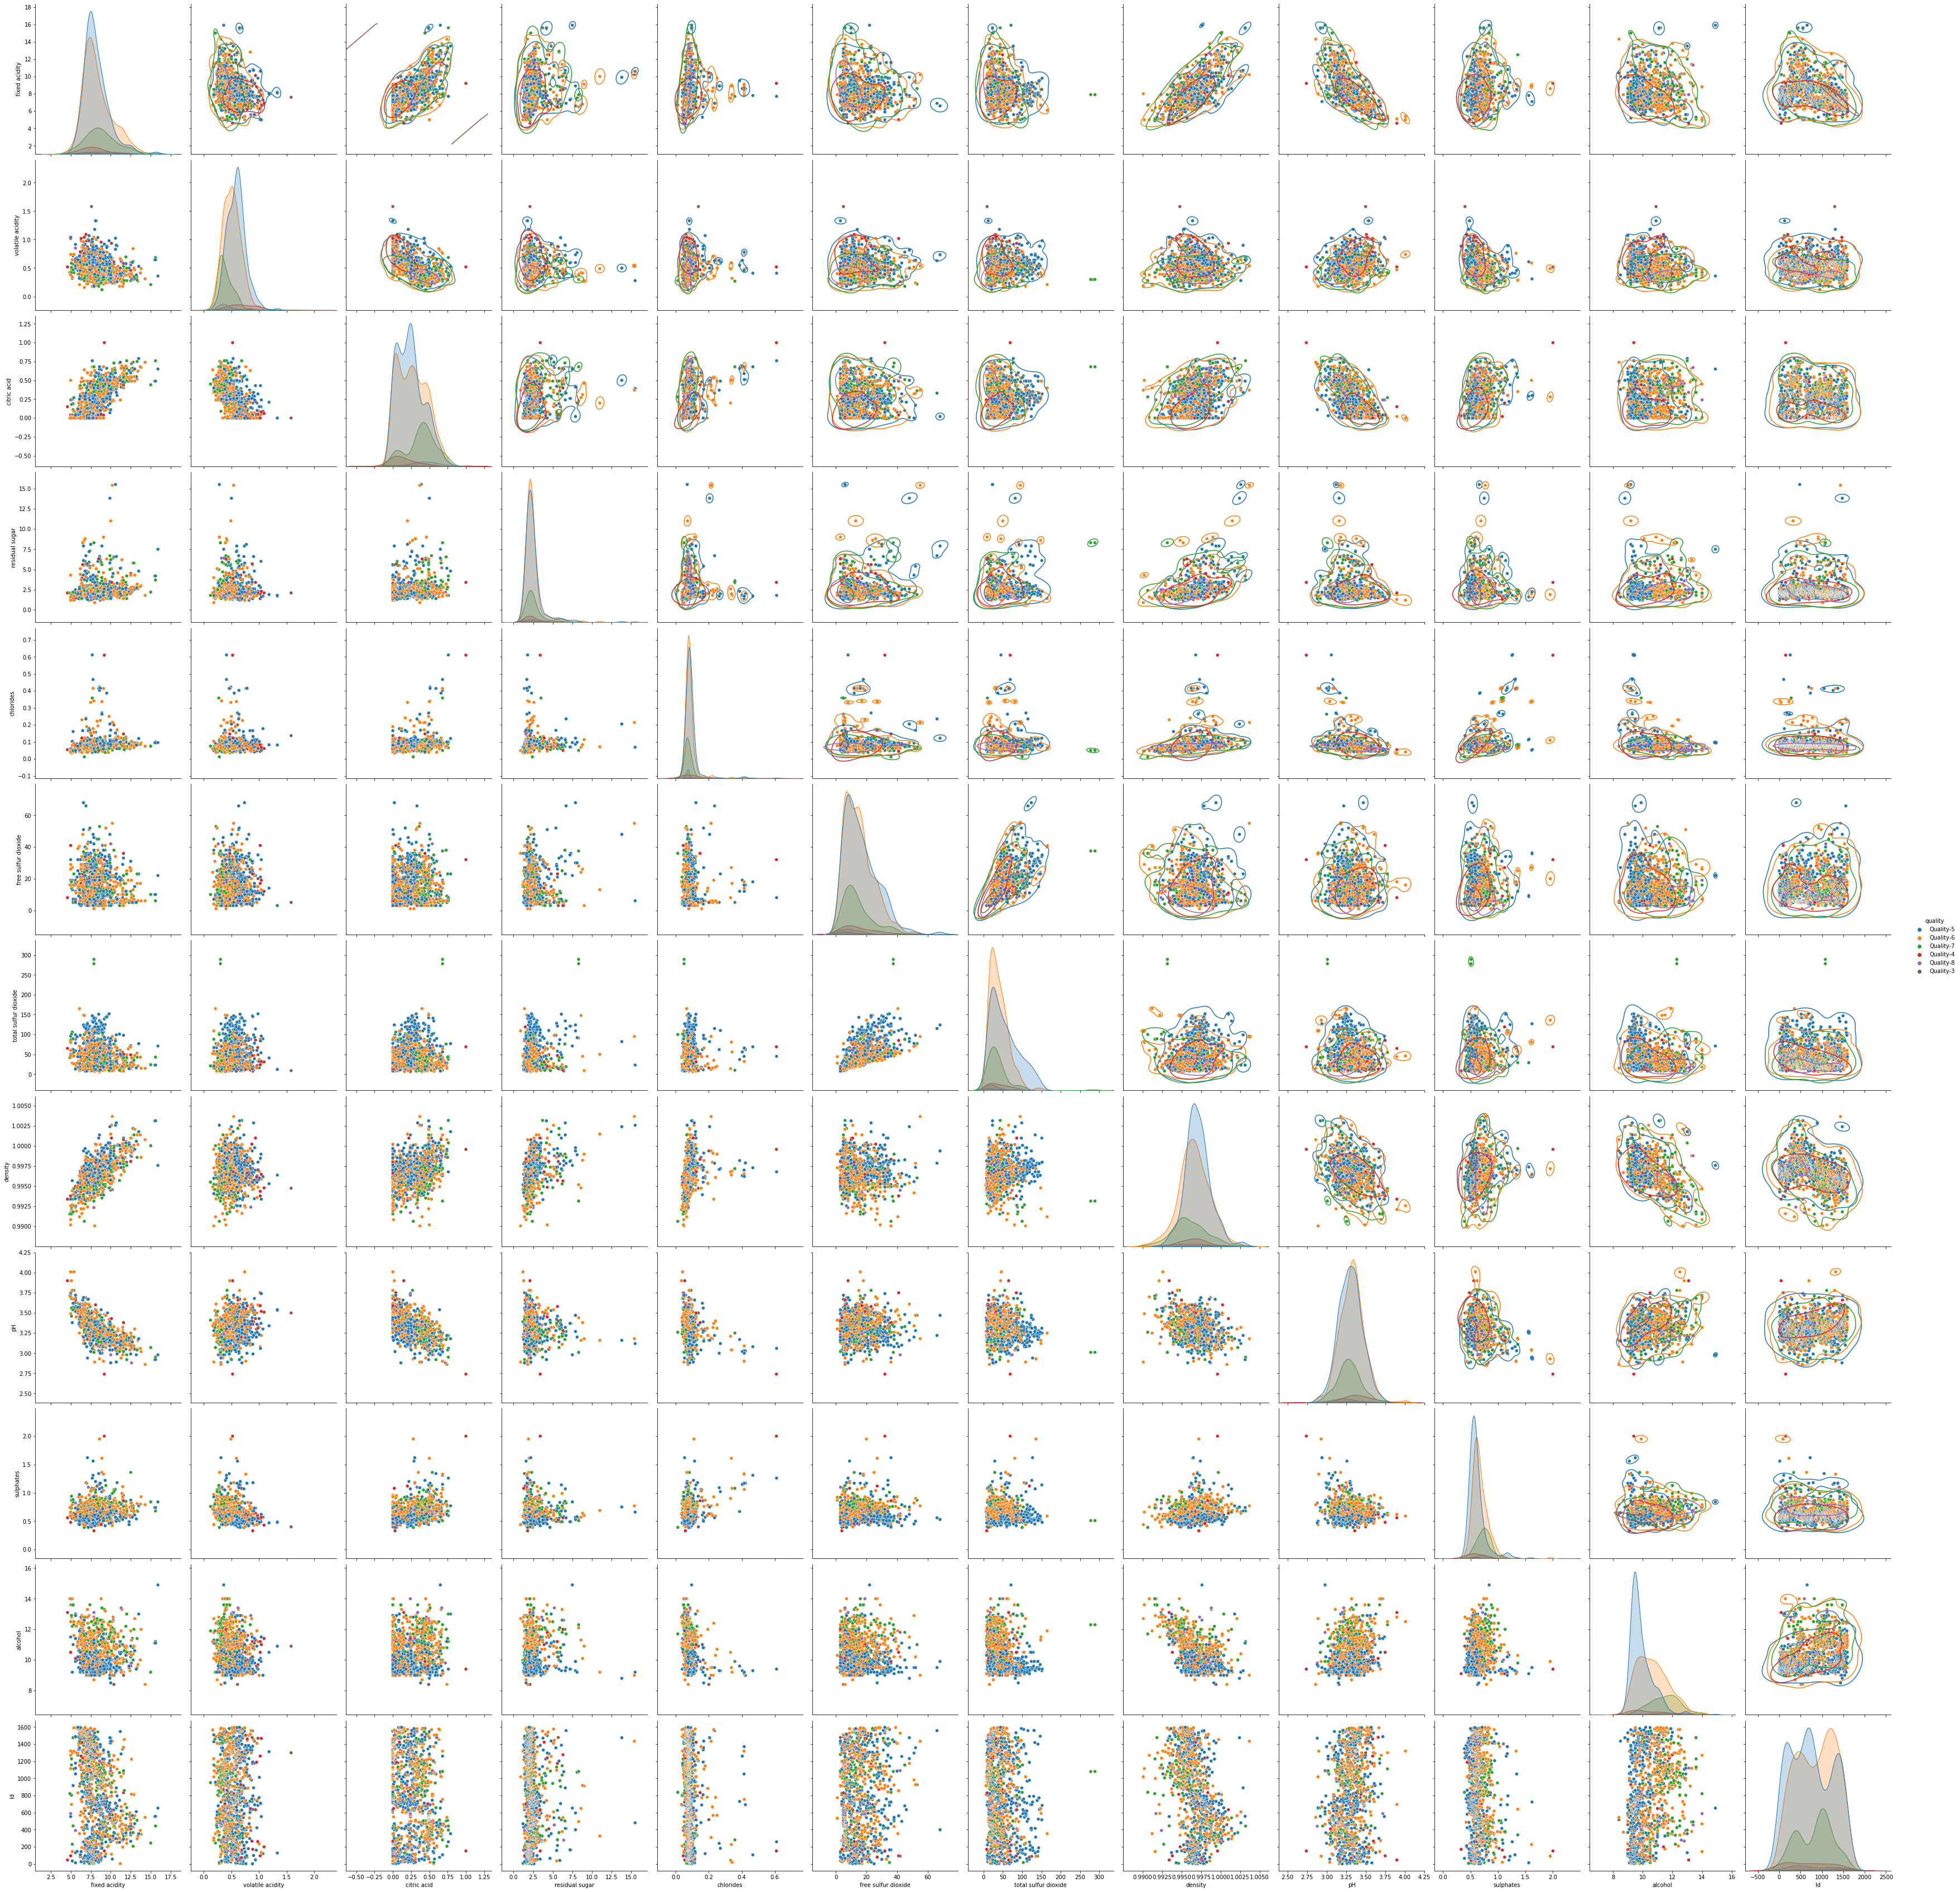

In [67]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [68]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Inference: The dataset doesn't have any null elements


In [69]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.drop_duplicates()
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [106]:
#Removal of outlier:

df2 = df1.copy()

for i in features:
    if df2[i].nunique()>=12:
        Q1 = df2[i].quantile(0.06)
        Q3 = df2[i].quantile(0.94)
        IQR = Q3 - Q1
        df2 = df2[df2[i] <= (Q3+(1.5*IQR))]
        df2 = df2[df2[i] >= (Q1-(1.5*IQR))]
df2 = df2.reset_index(drop=True)
display(df2.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df2.shape[1], df2.shape[0]))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4


Inference: After removal of outliers, The dataset now has 13 features & 1106 samples.


In [110]:
#Converting categorical Columns to Numeric

df3 = df2.copy()

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df2[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
    

In [111]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

xf = df4.columns
X = df4.drop([target],axis=1)
Y = df4[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
5    467
6    445
7    140
4     32
8     16
3      6
Name: quality, dtype: int64

Class distribution after applying SMOTE Technique:
5    467
6    467
7    467
4    467
8    467
3    467
Name: quality, dtype: int64


In [112]:
df4.shape

(1106, 13)

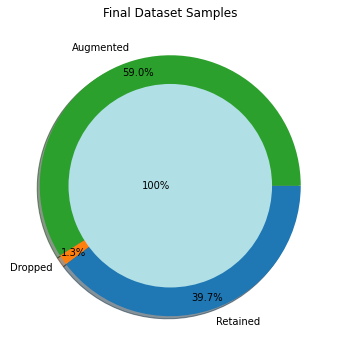


Inference:The final dataset after cleanup has 1143 samples & 13 rows.


In [113]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [114]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (2802, 12) (2802,) 
Training set  --->  (2241, 12) (2241,) 
Testing set   --->  (561, 12)  (561,)


In [115]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


fixed acidity  volatile acidity   citric acid  residual sugar  \
count   2.241000e+03      2.241000e+03  2.241000e+03    2.241000e+03   
mean   -9.083913e-16      3.519422e-16 -2.758466e-16    5.231573e-17   
std     1.000223e+00      1.000223e+00  1.000223e+00    1.000223e+00   
min    -2.300426e+00     -1.841256e+00 -1.371791e+00   -1.613576e+00   
25%    -7.283773e-01     -8.016554e-01 -1.018335e+00   -6.167370e-01   
50%    -2.149160e-01     -1.308971e-01 -4.811421e-03   -3.347057e-01   
75%     5.934434e-01      5.205271e-01  8.131853e-01    1.571674e-01   
max     4.324343e+00      3.916628e+00  2.551235e+00    6.158018e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  2.241000e+03         2.241000e+03          2.241000e+03  2.241000e+03   
mean   4.597443e-17         1.109728e-17          1.093874e-16 -5.365295e-14   
std    1.000223e+00         1.000223e+00          1.000223e+00  1.000223e+00   
min   -2.816074e+00        -1.366750e+00         -1.152342e+00 -3.520274e+00   
25%   -5.586949e-01        -8.000657e-01         -7.430806e-01 -7.107544e-01   
50%   -2.026358e-01        -3.161330e-01         -3.347025e-01 -3.390420e-02   
75%    1.994316e-01         4.466394e-01          4.099084e-01  6.324176e-01   
max    4.697335e+00         6.226817e+00          4.980847e+00  3.509562e+00   

                 pH     sulphates       alcohol            Id  
count  2.241000e+03  2.241000e+03  2.241000e+03  2.241000e+03  
mean   1.743858e-15  2.671273e-16  3.963313e-18  8.005892e-17  
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00  
min   -3.109741e+00 -2.243830e+00 -1.993532e+00 -1.888195e+00  
25%   -6.799090e-01 -7.231358e-01 -8.049943e-01 -8.402203e-01  
50%   -4.955561e-03 -1.743536e-01 -1.238630e-01  5.298998e-02  
75%    6.035541e-01  6.140317e-01  6.892647e-01  8.820837e-01  
max    4.652223e+00  5.040831e+00  2.992251e+00  1.642639e+00


                                Standardardization on Testing set                                


fixed acidity  volatile acidity  citric acid  residual sugar  \
count     561.000000        561.000000   561.000000      561.000000   
mean       -0.037888         -0.046284     0.035228        0.070421   
std         1.020437          1.008702     0.995620        1.095798   
min        -2.216619         -1.841256    -1.371791       -1.121703   
25%        -0.734572         -0.830225    -0.974523       -0.557255   
50%        -0.199015         -0.198492     0.042517       -0.338658   
75%         0.591620          0.446123     0.862844        0.243680   
max         4.505018          3.769004     2.402259        6.354768   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  561.000000           561.000000            561.000000  561.000000   
mean     0.009977            -0.045113             -0.060318   -0.072658   
std      0.949251             0.990716              0.954218    1.032606   
min     -2.372289            -1.366750             -1.191160   -2.730224   
25%     -0.544435            -0.800066             -0.759995   -0.778319   
50%     -0.162429            -0.349206             -0.375989   -0.032108   
75%      0.239638             0.359255              0.361546    0.569714   
max      4.742793             6.226817              4.476218    3.536434   

               pH   sulphates     alcohol          Id  
count  561.000000  561.000000  561.000000  561.000000  
mean    -0.003947   -0.010726    0.084770    0.022526  
std      1.022307    1.011141    1.087401    0.986236  
min     -2.704769   -2.313368   -1.993532   -1.866086  
25%     -0.679909   -0.742568   -0.802801   -0.835798  
50%     -0.072451   -0.171368   -0.090592    0.061834  
75%      0.647193    0.614945    0.880080    0.919669  
max      3.760003    5.040831    3.793538    1.636006

---

## <center> 5. Feature Selection/Extraction

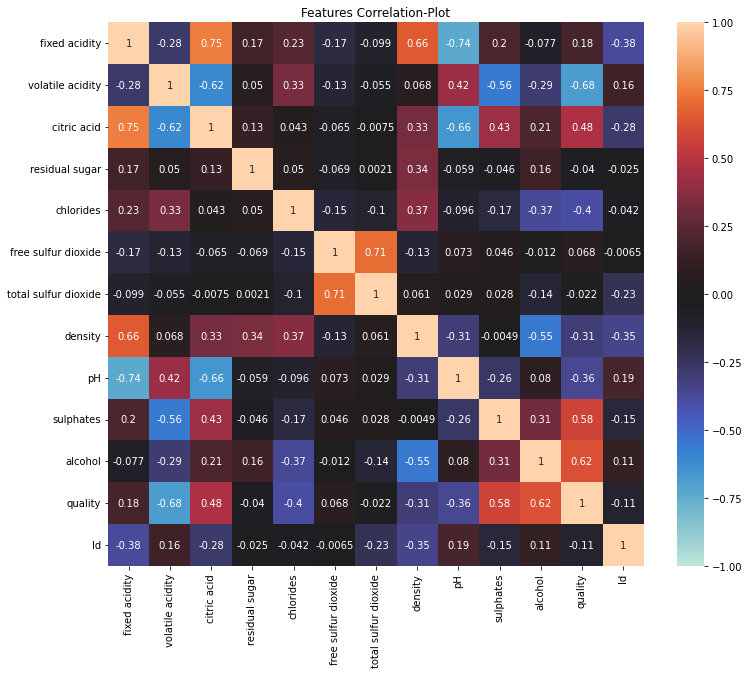

In [116]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. The features do not have some multi-collinearity between them like those of charges with age & smoking. Hence we shall perform Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)

## 5a. Manual Method - VIF

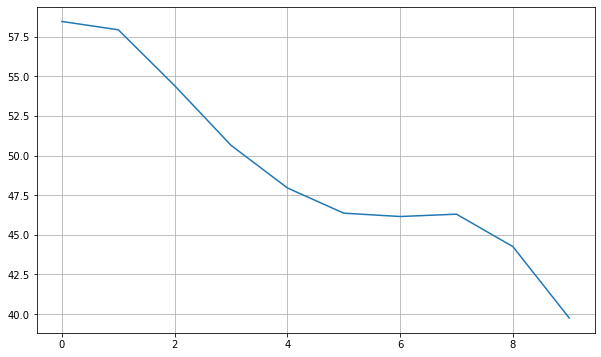

In [151]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-2):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>=2.5:
        scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

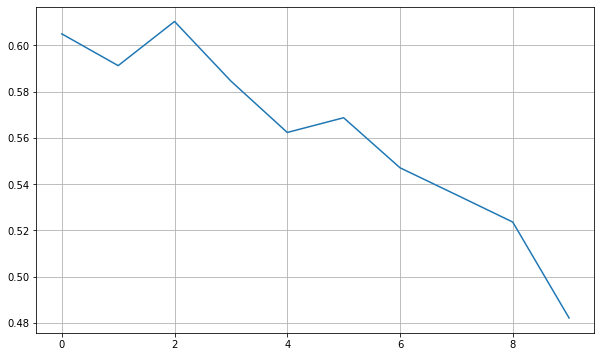

In [153]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores=[]

for i in range(10):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(f1_score(Test_Y,LR.fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]), average='weighted'))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In both VIF & RFE Techniques, we can notice better scores upon dropping some multicollinear features. While the scores of VIF technique decline wrt to each feature drop, the RFE technique can increase the F2-score for dropping 2 features. Hence we shall use the features shortlisted by RFE Technique.

In [159]:
#Dropping the shortlisted features

DROP = [i for i in Train_X_std.columns if i not in Train_X_std.columns[rfe.support_]]
print('Dropping Feature -->',DROP)

Train_X_std = Train_X_std.drop(DROP, axis=1)
Test_X_std = Test_X_std.drop(DROP, axis=1)

Dropping Feature --> ['residual sugar', 'free sulfur dioxide']


---

## <center> 6. Predictive Modeling

In [160]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)              0.0        0.0     0.0       0.0   
Decision Tree Classifier (DT)         0.0        0.0     0.0       0.0   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                   0.0  
Decision Tree Classifier (DT)              0.0  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)                 0.0  
Gradient Boosting (GB)                     0.0  
Extreme Gradient Boosting (XGB)            0.0

In [185]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 62.0%
F1 Score = 60.8%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 2 48 14 15  0  2]
 [ 3 20 55  9  8  2]
 [ 3 16 29 28 21  5]
 [ 0  0  2 14 53 26]
 [ 0  0  0  0 22 75]]

Classification Report:
               precision    recall  f1-score   support

           3       0.92      1.00      0.96        89
           4       0.57      0.59      0.58        81
           5       0.55      0.57      0.56        97
           6       0.42      0.27      0.33       102
           7       0.51      0.56      0.53        95
           8       0.68      0.77      0.72        97

    accuracy                           0.62       561
   macro avg       0.61      0.63      0.61       561
weighted avg       0.60      0.62      0.61       561



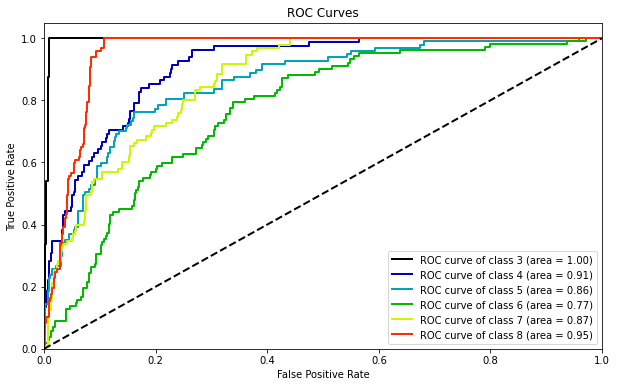


Interpreting the Output of Logistic Regression:

intercept  -24.443218071423
classes [3 4 5 6 7 8]


coeff
fixed acidity         -0.596532
volatile acidity      10.114269
citric acid            6.596276
chlorides              0.225946
total sulfur dioxide  -4.542857
density                3.313380
pH                     4.212810
sulphates             -0.978454
alcohol              -14.479823
Id                     7.408219

In [221]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

#LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 78.60000000000001%
F1 Score = 78.3%

 Confusiton Matrix:
 [[87  1  1  0  0  0]
 [ 1 71  4  3  2  0]
 [ 5  7 57 21  6  1]
 [ 0  6 27 58  8  3]
 [ 0  0  0 10 79  6]
 [ 0  0  1  4  3 89]]

Classification Report:
               precision    recall  f1-score   support

           3       0.94      0.98      0.96        89
           4       0.84      0.88      0.86        81
           5       0.63      0.59      0.61        97
           6       0.60      0.57      0.59       102
           7       0.81      0.83      0.82        95
           8       0.90      0.92      0.91        97

    accuracy                           0.79       561
   macro avg       0.79      0.79      0.79       561
weighted avg       0.78      0.79      0.78       561



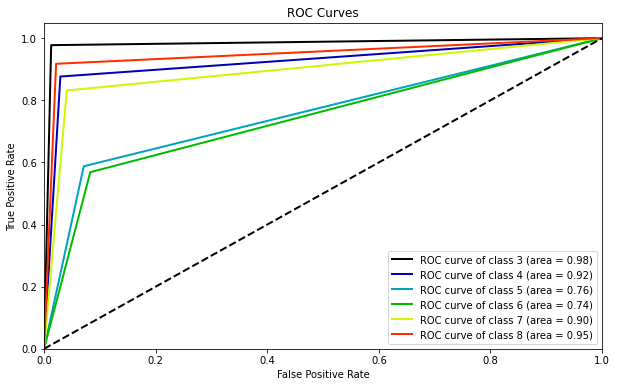


Interpreting the output of Decision Tree:



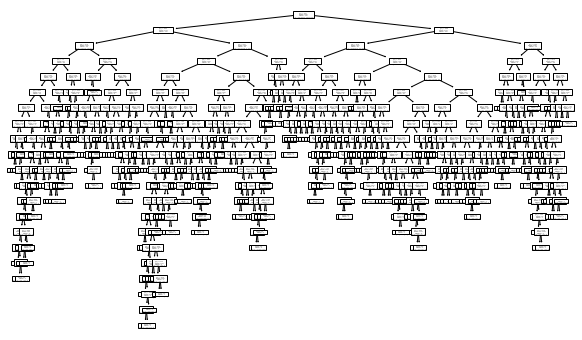

In [222]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 84.8%
F1 Score = 84.39999999999999%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 0 78  1  1  1  0]
 [ 1  3 71 18  4  0]
 [ 0  3 26 58 11  4]
 [ 0  1  1  7 83  3]
 [ 0  0  0  0  0 97]]

Classification Report:
               precision    recall  f1-score   support

           3       0.99      1.00      0.99        89
           4       0.92      0.96      0.94        81
           5       0.72      0.73      0.72        97
           6       0.69      0.57      0.62       102
           7       0.84      0.87      0.86        95
           8       0.93      1.00      0.97        97

    accuracy                           0.85       561
   macro avg       0.85      0.86      0.85       561
weighted avg       0.84      0.85      0.84       561



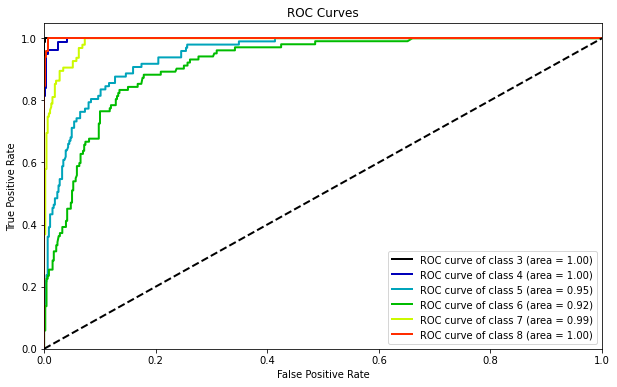


Interpreting the output of Random Forest:



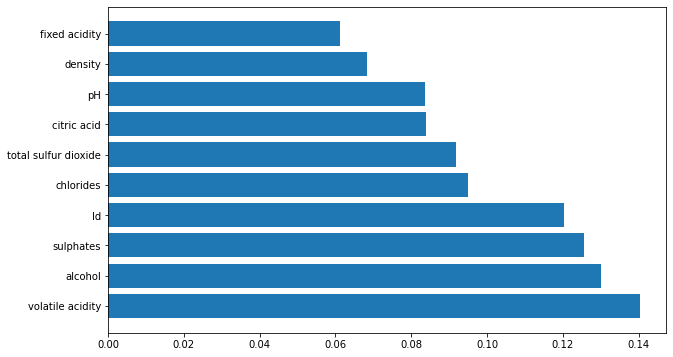

In [254]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 500,]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 45.5%
F1 Score = 43.1%

 Confusiton Matrix:
 [[56 16 17  0  0  0]
 [16 40 13  6  3  3]
 [14 22 43  6  9  3]
 [10 19 26 11 14 22]
 [ 0  3  5 23 30 34]
 [ 0  5  0  1 16 75]]

Classification Report:
               precision    recall  f1-score   support

           3       0.58      0.63      0.61        89
           4       0.38      0.49      0.43        81
           5       0.41      0.44      0.43        97
           6       0.23      0.11      0.15       102
           7       0.42      0.32      0.36        95
           8       0.55      0.77      0.64        97

    accuracy                           0.45       561
   macro avg       0.43      0.46      0.44       561
weighted avg       0.43      0.45      0.43       561



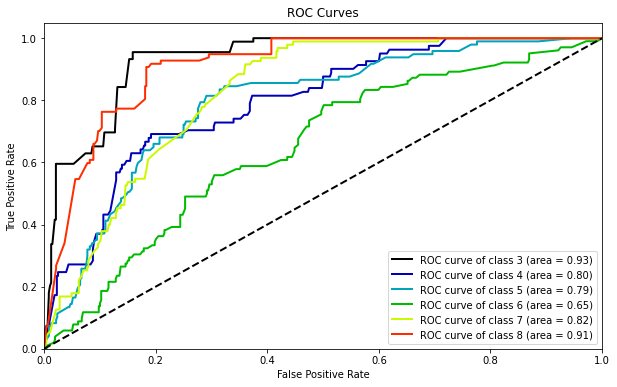

In [210]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 14.399999999999999%
F1 Score = 3.5999999999999996%

 Confusiton Matrix:
 [[  0  89   0   0   0   0]
 [  0  81   0   0   0   0]
 [  0  97   0   0   0   0]
 [  0 102   0   0   0   0]
 [  0  95   0   0   0   0]
 [  0  97   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        89
           4       0.14      1.00      0.25        81
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00       102
           7       0.00      0.00      0.00        95
           8       0.00      0.00      0.00        97

    accuracy                           0.14       561
   macro avg       0.02      0.17      0.04       561
weighted avg       0.02      0.14      0.04       561



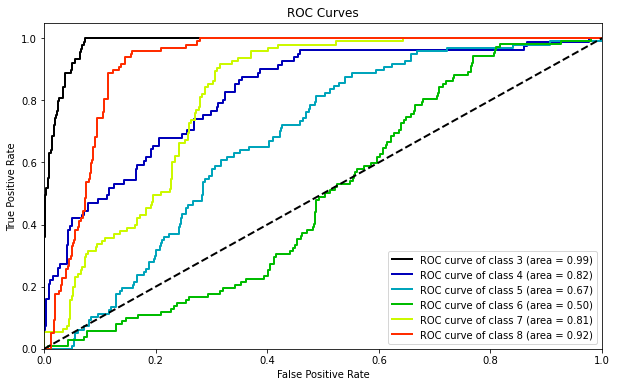

In [212]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 75.6%
F1 Score = 73.3%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 0 80  0  1  0  0]
 [ 4 18 50 15  9  1]
 [ 2 18 19 33 23  7]
 [ 0  0  2  6 75 12]
 [ 0  0  0  0  0 97]]

Classification Report:
               precision    recall  f1-score   support

           3       0.94      1.00      0.97        89
           4       0.69      0.99      0.81        81
           5       0.70      0.52      0.60        97
           6       0.60      0.32      0.42       102
           7       0.70      0.79      0.74        95
           8       0.83      1.00      0.91        97

    accuracy                           0.76       561
   macro avg       0.74      0.77      0.74       561
weighted avg       0.74      0.76      0.73       561



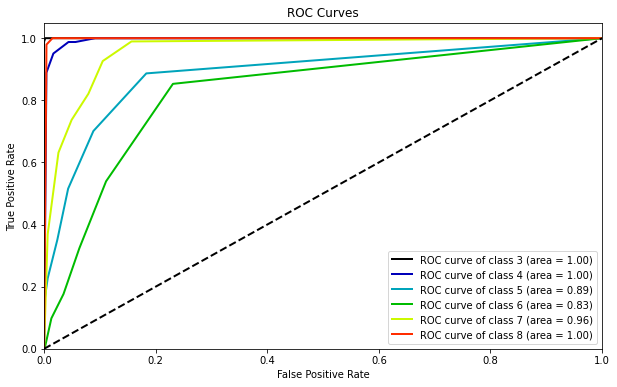

In [213]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 10.9%
F1 Score = 5.800000000000001%

 Confusiton Matrix:
 [[ 8 81  0  0  0  0]
 [28 53  0  0  0  0]
 [53 44  0  0  0  0]
 [76 26  0  0  0  0]
 [90  5  0  0  0  0]
 [92  5  0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.02      0.09      0.04        89
           4       0.25      0.65      0.36        81
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00       102
           7       0.00      0.00      0.00        95
           8       0.00      0.00      0.00        97

    accuracy                           0.11       561
   macro avg       0.05      0.12      0.07       561
weighted avg       0.04      0.11      0.06       561



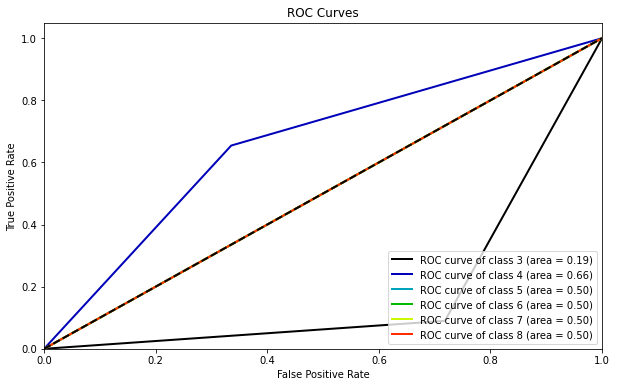

In [214]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

---

## 8. Extreme Gradient Boosting Classfier:

[01:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 82.5%
F1 Score = 82.0%

 Confusiton Matrix:
 [[89  0  0  0  0  0]
 [ 0 76  2  2  1  0]
 [ 0  5 69 20  3  0]
 [ 0  4 28 52 14  4]
 [ 0  1  0  9 82  3]
 [ 0  0  0  0  2 95]]

Classification Report:
               precision    recall  f1-score   su

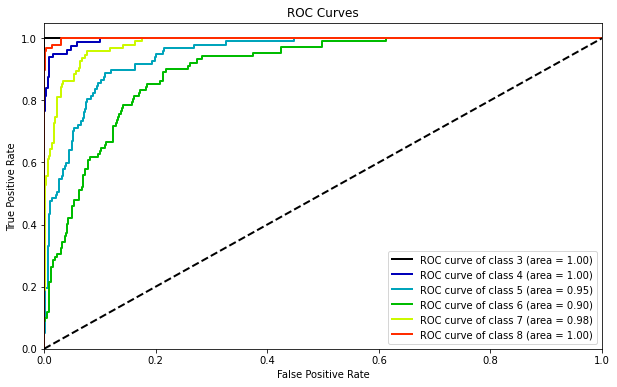

In [215]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier().fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,7)

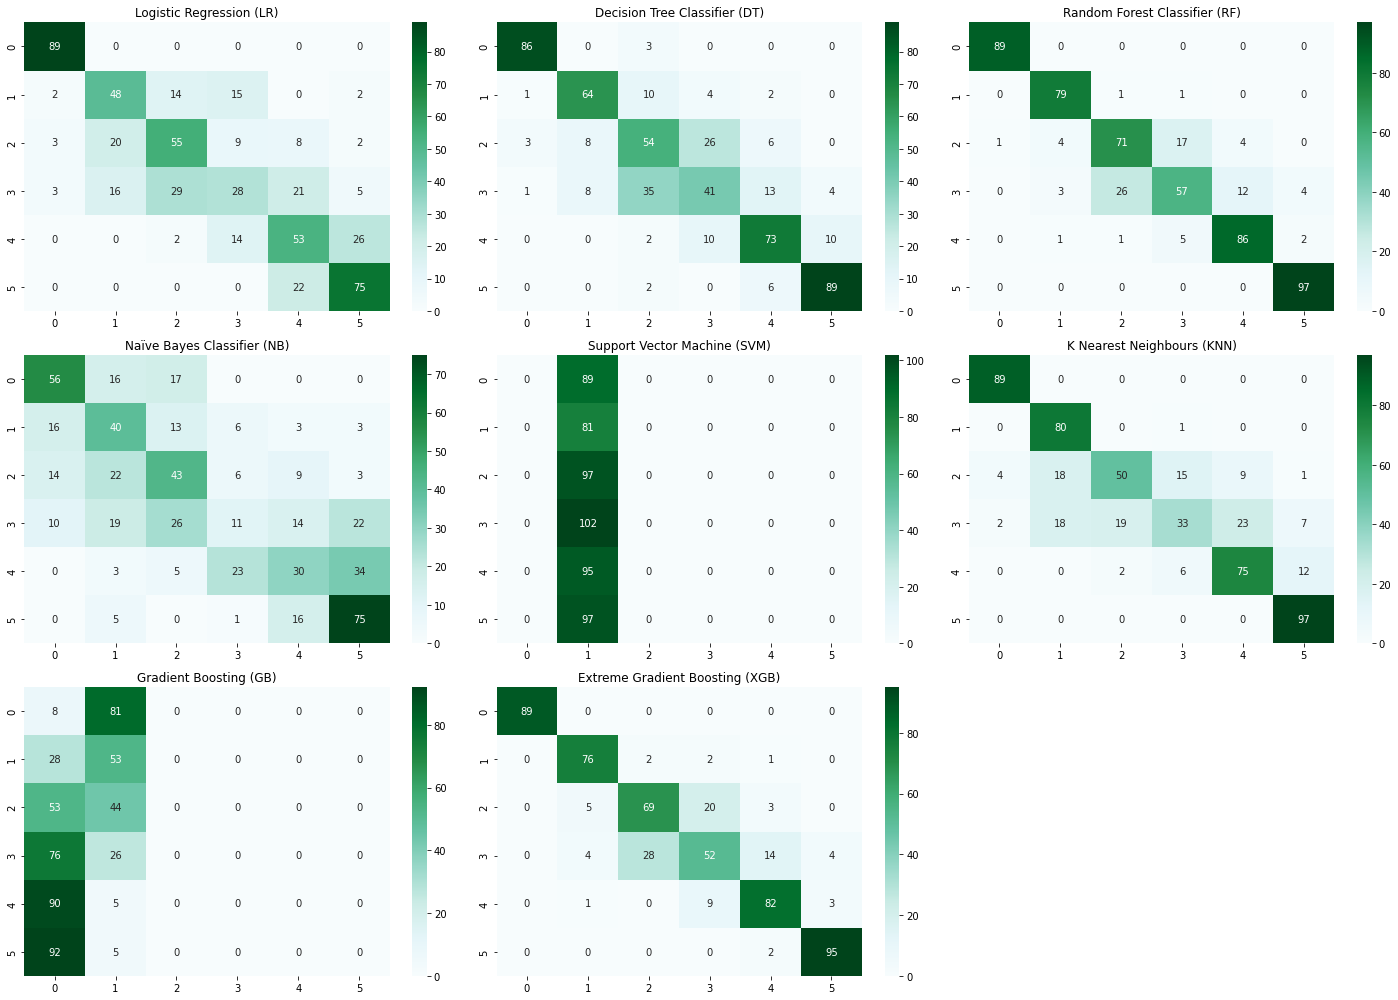

In [216]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

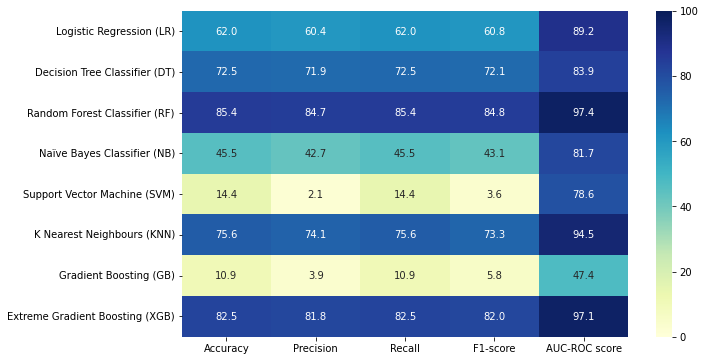

In [218]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=0.0, vmax=100.0, cmap='YlGnBu', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the AUC-ROC-score. Except Support Vectors & Gradient Boosting Classifier, most of the algorithms perform well. The best performing algorithm is Random Forest Classifier & Extreme Gradient Classifier...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was small totally around 1338 samples & after preprocessing 1.3% of the datasamples were dropped. 
- The samples were highly imbalanced, hence SMOTE Technique was applied on the data to  balance the classes, adding 59% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the featureset.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The boosting & ensemble algorithms perform the best on the current dataset, followed by Nearest Neighbours Algorithm.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>